## 1. Import Library Yang Dibutuhkan

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## 2. Load dataset

In [2]:
file_path = "/content/CreditDataset.csv"
data = pd.read_csv(file_path)  # Membaca data dari file CSV

## 3. Encode Fitur Kategorikal

In [3]:
label_encoders = {}  # Inisialisasi dictionary untuk menyimpan encoder
for column in data.columns:
    if data[column].dtype == 'object':  # Jika tipe data adalah kategorikal
        le = LabelEncoder()  # Inisialisasi LabelEncoder
        data[column] = le.fit_transform(data[column])  # Encode fitur
        label_encoders[column] = le  # Simpan encoder untuk referensi

## 4. Pisahkan Fitur dan Target

In [4]:
X = data.drop(columns=['Class'])  # Fitur adalah semua kolom kecuali 'Class'
y = data['Class']  # Target adalah kolom 'Class'

## 5. Standarisasi Fitur

In [5]:
scaler = StandardScaler()  # Inisialisasi StandardScaler untuk normalisasi data
X = scaler.fit_transform(X)  # Terapkan standarisasi pada fitur

## 6. Pemodelan

In [6]:
# Bagi dataset menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 80% data untuk pelatihan, 20% untuk pengujian, dengan random_state untuk konsistensi

# Inisialisasi model
dt_classifier = DecisionTreeClassifier(random_state=42)  # Model Decision Tree
knn_classifier = KNeighborsClassifier()  # Model KNN

# Latih model
dt_classifier.fit(X_train, y_train)  # Melatih Decision Tree dengan data pelatihan
knn_classifier.fit(X_train, y_train)  # Melatih KNN dengan data pelatihan

# Prediksi pada data pengujian
y_pred_dt = dt_classifier.predict(X_test)  # Prediksi dengan model Decision Tree
y_pred_knn = knn_classifier.predict(X_test)  # Prediksi dengan model KNN

# Evaluasi model
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)  # Evaluasi Decision Tree
knn_report = classification_report(y_test, y_pred_knn, output_dict=True)  # Evaluasi KNN


## 7. Hasil dan Evaluasi

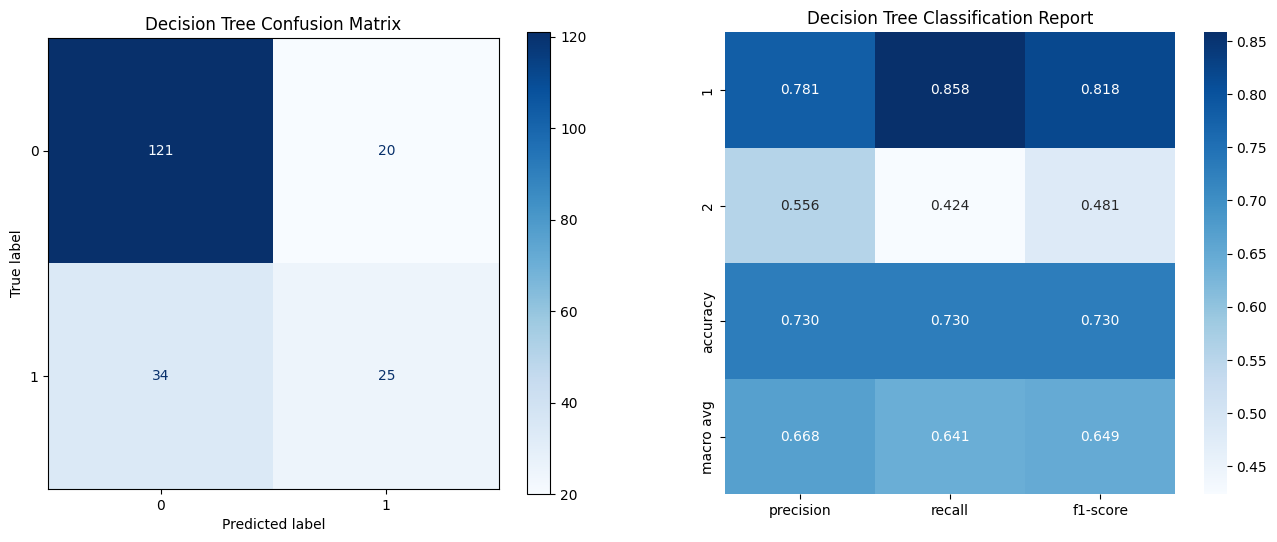

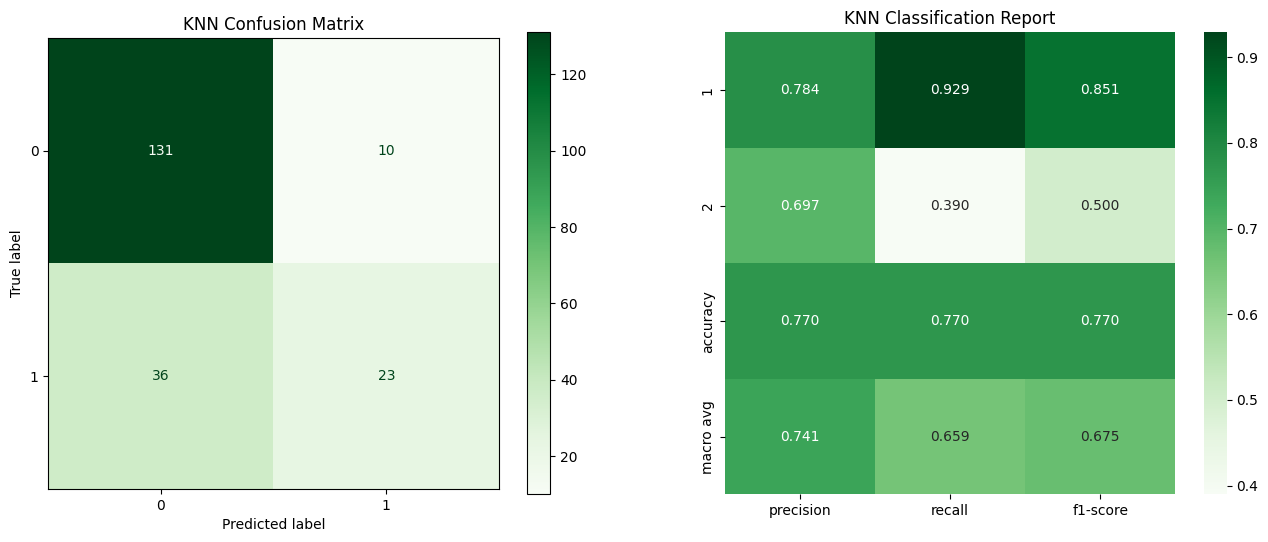

In [7]:
# Evaluasi model dan konversi ke DataFrame
dt_report = pd.DataFrame(classification_report(y_test, y_pred_dt, output_dict=True)).transpose()  # Laporan untuk Decision Tree
knn_report = pd.DataFrame(classification_report(y_test, y_pred_knn, output_dict=True)).transpose()  # Laporan untuk KNN

# Plot hasil evaluasi untuk Decision Tree
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Confusion matrix plot untuk Decision Tree
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt)).plot(ax=ax1, cmap='Blues')
ax1.set_title("Decision Tree Confusion Matrix")

# Heatmap untuk classification report Decision Tree
sns.heatmap(dt_report.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".3f", ax=ax2)
ax2.set_title("Decision Tree Classification Report")

plt.show()  # Tampilkan plot untuk Decision Tree

# Plot hasil evaluasi untuk KNN
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 6))

# Confusion matrix plot untuk KNN
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn)).plot(ax=ax3, cmap='Greens')
ax3.set_title("KNN Confusion Matrix")

# Heatmap untuk classification report KNN
sns.heatmap(knn_report.iloc[:-1, :-1], annot=True, cmap="Greens", fmt=".3f", ax=ax4)
ax4.set_title("KNN Classification Report")

plt.show()  # Tampilkan plot untuk KNN